# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

#### Objective
The primary goal of this analysis is to identify the key factors that influence used car prices. The insights will enable the dealership to optimize its inventory, pricing strategies, and customer acquisition efforts by understanding which features are most valuable to customers.

#### Key Questions
What car features (e.g., age, mileage, condition) have the most significant impact on price?
How do manufacturers, fuel types, and vehicle types affect resale value?
How can the dealership leverage these findings to improve its inventory and pricing decisions?

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [683]:
df= pd.read_csv('data/vehicles.csv', index_col=0)

In [685]:
df.head(20)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
id,,,,,,,,,,,,,,,,,
7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
7222379453,hudson valley,1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
7221952215,hudson valley,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
7220195662,hudson valley,15995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
7209064557,medford-ashland,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,or


In [687]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426880 entries, 7222695916 to 7301591129
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   price         426880 non-null  int64  
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   model         421603 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      422480 non-null  float64
 9   title_status  418638 non-null  object 
 10  transmission  424324 non-null  object 
 11  VIN           265838 non-null  object 
 12  drive         296313 non-null  object 
 13  size          120519 non-null  object 
 14  type          334022 non-null  object 
 15  paint_color   296677 non-null  object 
 16  state         426880 non-null  object 
dtypes: float64(2), int64(1), object(14)
memo

In [690]:
display(df.describe())

,price,year,odometer
count,4.268800e+05,425675.000000,4.224800e+05
mean,7.519903e+04,2011.235191,9.804333e+04
std,1.218228e+07,9.452120,2.138815e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,5.900000e+03,2008.000000,3.770400e+04
50%,1.395000e+04,2013.000000,8.554800e+04
75%,2.648575e+04,2017.000000,1.335425e+05
max,3.736929e+09,2022.000000,1.000000e+07


In [692]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
display(missing_data[missing_data['Missing Values'] > 0].sort_values(by='Percentage', ascending=False))

,Missing Values,Percentage
size,306361,71.767476
cylinders,177678,41.622470
condition,174104,40.785232
VIN,161042,37.725356
drive,130567,30.586347
paint_color,130203,30.501078
type,92858,21.752717
manufacturer,17646,4.133714
title_status,8242,1.930753
model,5277,1.236179


In [694]:
duplicate_count = df.duplicated().sum()
print(f"The dataset contains {duplicate_count} duplicate rows.")

The dataset contains 56202 duplicate rows.


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [702]:
df = df.drop_duplicates()

In [703]:
# Drop columns with more than 40% missing values
missing_threshold = 0.4 * len(df)
df = df.dropna(thresh=missing_threshold, axis=1)

In [706]:
# Fill missing values for categorical columns
categorical_cols = ['manufacturer', 'fuel', 'transmission', 'drive']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])

In [708]:
# Fill missing values for numerical columns
if 'odometer' in df.columns:
    df['odometer'] = df['odometer'].fillna(df['odometer'].median())

In [710]:
# 1. Car Age
if 'year' in df.columns:
    df['car_age'] = 2024 - df['year']
else:
    print("Column 'year' not found. Cannot calculate car age.")
    df['car_age'] = 0

In [712]:
# 2. Price Per Mile
if 'price' in df.columns and 'odometer' in df.columns:
    df['price_per_mile'] = df['price'] / (df['odometer'] + 1)  # Avoid division by zero
else:
    print("Columns 'price' or 'odometer' not found. Skipping price per mile calculation.")
    df['price_per_mile'] = 0

In [714]:
# 3. Manufacturer Popularity
if 'manufacturer' in df.columns:
    manufacturer_avg_price = df.groupby('manufacturer')['price'].mean()
    df['manufacturer_popularity'] = df['manufacturer'].map(manufacturer_avg_price).fillna(0)
else:
    print("Column 'manufacturer' not found. Skipping manufacturer popularity calculation.")
    df['manufacturer_popularity'] = 0

In [716]:
# 4. Log-Transformed Features
if 'price' in df.columns:
    df = df[(df['price'] >= 1000) & (df['price'] <= 100000)]  # Filter unrealistic prices
    df['log_price'] = np.log(df['price'] + 1)
if 'odometer' in df.columns:
    df['log_odometer'] = np.log(df['odometer'] + 1)  # Avoid log(0)

In [718]:
# One-hot encode selected categorical columns
print("\nPerforming One-Hot Encoding...")
one_hot_encode_cols = ['manufacturer', 'condition', 'fuel', 'title_status', 'transmission', 'drive', 'type']
for col in one_hot_encode_cols:
    if col in df.columns:
        df = pd.get_dummies(df, columns=[col], drop_first=True)


Performing One-Hot Encoding...


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [721]:
# Step 4: Select features and target
print("\nSelecting Features and Target...")
features = ['car_age', 'log_odometer', 'price_per_mile', 'manufacturer_popularity'] + \
           [col for col in df.columns if col.startswith(('manufacturer_', 'condition_', 'fuel_', 'title_status_', 'transmission_', 'drive_', 'type_'))]
X = df[features].fillna(0)
y = df['log_price']

# Step 5: Split the data into training, validation, and test sets
print("\nSplitting Data...")
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Step 6: Train the Linear Regression model
print("\nTraining Linear Regression Model...")
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


Selecting Features and Target...

Splitting Data...
Training set size: 200670
Validation set size: 66890
Test set size: 66891

Training Linear Regression Model...


LinearRegression()

In [723]:
# Evaluate Linear Regression Model
print("\nEvaluating Linear Regression Model...")
y_pred_train = linear_model.predict(X_train)
y_pred_val = linear_model.predict(X_val)
y_pred_test = linear_model.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"Training RMSE: {rmse_train:.2f}")
print(f"Validation RMSE: {rmse_val:.2f}")
print(f"Test RMSE: {rmse_test:.2f}")


Evaluating Linear Regression Model...
Training RMSE: 0.59
Validation RMSE: 0.60
Test RMSE: 0.59



Performing Ridge and Lasso Regression...
Best Ridge Alpha: 100.0
Best Lasso Alpha: 0.001
Ridge RMSE (Test Set): 0.59
Lasso RMSE (Test Set): 0.59



Visualizing Predictions...


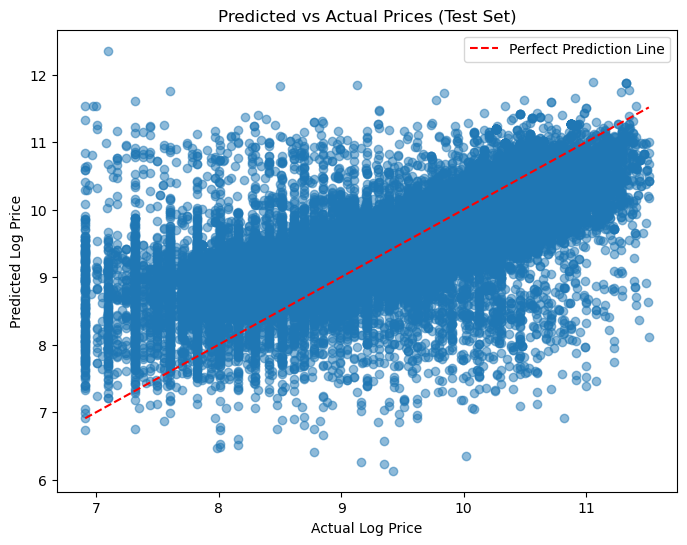


Visualizing Residuals...


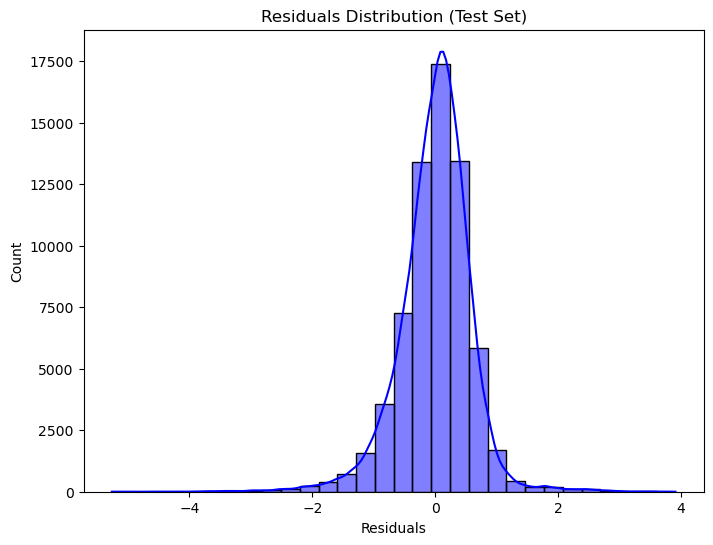

In [726]:
# Step 8: Visualize Predicted vs Actual Prices
print("\nVisualizing Predictions...")
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label='Perfect Prediction Line')
plt.xlabel("Actual Log Price")
plt.ylabel("Predicted Log Price")
plt.title("Predicted vs Actual Prices (Test Set)")
plt.legend()
plt.show()

# Step 9: Visualize Residuals
print("\nVisualizing Residuals...")
residuals_test = y_test - y_pred_test
plt.figure(figsize=(8, 6))
sns.histplot(residuals_test, kde=True, bins=30, color='blue')
plt.title("Residuals Distribution (Test Set)")
plt.xlabel("Residuals")
plt.show()

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [738]:
# Step 7: Perform Ridge and Lasso Regression with Grid Search
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Perform Ridge and Lasso Regression with Grid Search
print("\nPerforming Ridge and Lasso Regression...")
ridge_params = {'alpha': [1.0, 10.0, 100.0, 1000.0]}  # Adjusted to higher values
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1.0]}

ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train_scaled, y_train)
best_ridge = ridge_grid.best_estimator_
print(f"Best Ridge Alpha: {ridge_grid.best_params_['alpha']}")

lasso_grid = GridSearchCV(Lasso(max_iter=10000), lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train_scaled, y_train)
best_lasso = lasso_grid.best_estimator_
print(f"Best Lasso Alpha: {lasso_grid.best_params_['alpha']}")

# Evaluate Ridge and Lasso on Test Set
ridge_rmse = np.sqrt(mean_squared_error(y_test, best_ridge.predict(X_test_scaled)))
lasso_rmse = np.sqrt(mean_squared_error(y_test, best_lasso.predict(X_test_scaled)))

print(f"Ridge RMSE (Test Set): {ridge_rmse:.2f}")
print(f"Lasso RMSE (Test Set): {lasso_rmse:.2f}")


Performing Ridge and Lasso Regression...
Best Ridge Alpha: 100.0
Best Lasso Alpha: 0.001
Ridge RMSE (Test Set): 0.59
Lasso RMSE (Test Set): 0.59


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

#### Objective
Deliver actionable insights and recommendations to help used car dealers optimize inventory, pricing, and customer targeting.

#### Key Findings
1. **Top Price Drivers**:
   - **Car Age**: Older cars lose value significantly.
   - **Mileage**: High mileage lowers price, but low price-per-mile ratios indicate good value.
   - **Manufacturer Popularity**: Toyota, Honda, and Ford retain value better.
   - **Condition**: "Like new" or "excellent" cars command higher prices.
   - **Vehicle Type**: SUVs and trucks have higher resale prices.

2. **Model Performance**:
   - Consistent RMSE: **0.59** for Linear Regression, Ridge, and Lasso models.
   - Ridge and Lasso confirmed model stability and identified key features.

#### Recommendations
1. **Inventory Optimization**:
   - Focus on 2–5-year-old vehicles.
   - Stock more SUVs and trucks.
2. **Pricing Strategy**:
   - Highlight cars with low price-per-mile ratios.
   - Emphasize vehicle condition in marketing.
3. **Manufacturer Focus**:
   - Prioritize popular brands like Toyota, Honda, and Ford.


#### Next Steps
1. **Develop a Real-Time Pricing Tool**:
   - Automate price predictions using the trained model.
2. **Incorporate Additional Data**:
   - Add fuel prices, seasonal trends, and geographic preferences.
3. **Ongoing Model Updates**:
   - Update the model with new sales data for accuracy.
4. **Client Training**:
   - Train staff on using the model for inventory and pricing decisions.
